In [1]:
#This code is done in collaboration with Jens True and Tobias Valbjørn

# Reproducable results by setting the initial seed value
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# Import the Keras Dataset
from keras.datasets import mnist;
(x_train, y_train), (x_test, y_test) = mnist.load_data();

import matplotlib.pyplot as plt;
import numpy as np;


Using TensorFlow backend.


In [2]:
import itertools
def plot_confusion_matrix(cm,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print("Confusion matrix:\n%s" % cm)
    classes =range(10)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        title = title + " Normalized"
    else:
        print('Confusion matrix, without normalization')

    
    plt.figure(figsize=[10,10])
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
# We want to flatten the data from the current 28x28 matrix to a 784 flat array
dimension = 28*28
x_train = x_train.reshape(len(x_train), dimension)
x_test = x_test.reshape(len(x_test), dimension)

# Random Forest Classifier

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   56.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.7s finished


Accuracy=0.9714
Confusion matrix:
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1123    3    3    0    2    2    0    1    1]
 [   6    0 1000    6    2    0    4    8    6    0]
 [   0    0    8  974    0    7    0    9    9    3]
 [   1    0    1    0  960    0    5    0    2   13]
 [   3    0    1   10    3  860    5    2    5    3]
 [   6    3    0    0    3    3  940    0    3    0]
 [   1    2   19    1    2    0    0  993    1    9]
 [   4    0    4    9    4    4    4    4  931   10]
 [   5    4    2   10   11    3    1    5    6  962]]
Normalized confusion matrix


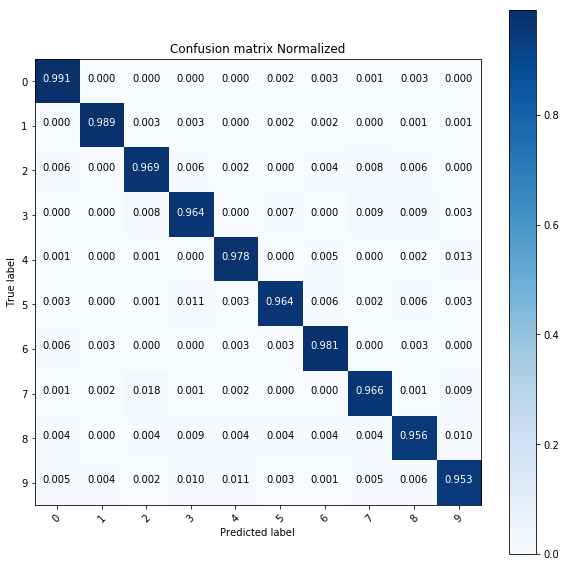

In [4]:
from sklearn.ensemble import RandomForestClassifier;
from sklearn import metrics;

clf_rf = RandomForestClassifier(n_estimators = 500, verbose = 1, n_jobs =-1)
clf_rf.fit(x_train, y_train)

expected = y_test
predicted = clf_rf.predict(x_test);
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
cm = metrics.confusion_matrix(expected, predicted, )

plot_confusion_matrix(cm)

# Linear SVC

[LibLinear]

/home/anders/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy=0.8361
Confusion matrix:
[[ 922    0    3   34    0    6    7    3    4    1]
 [   0 1101    5   12    0    1    3    2   11    0]
 [   7    6  749  181    3    0   11   17   55    3]
 [   0    0    5  955    1    4    0   19   22    4]
 [   5    5    4   30  739    6   20   40   33  100]
 [   8    2   12  272    2  501    7   24   57    7]
 [  10    3   11   48    4   17  863    0    1    1]
 [   1    5   11   23    1    1    1  962    9   14]
 [   5   11    7  124    5   29    6   24  756    7]
 [   8    6    1   37    5    4    0  118   17  813]]
Normalized confusion matrix


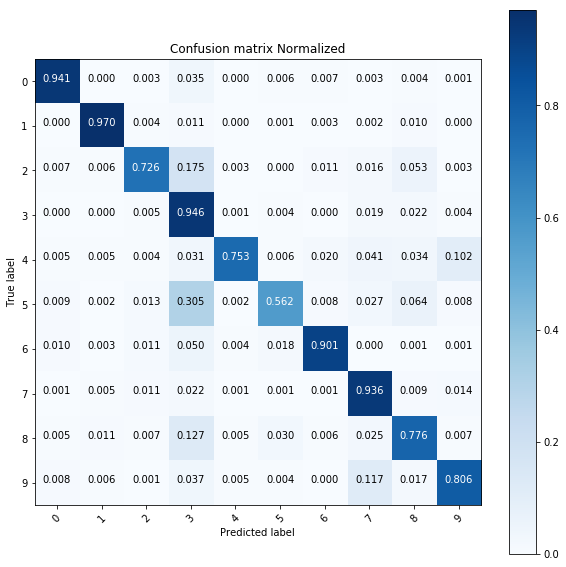

In [5]:
from sklearn.svm import LinearSVC;
clf_svm = LinearSVC(verbose=3)
clf_svm.fit(x_train, y_train)

expected = y_test
predicted = clf_svm.predict(x_test);
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
cm = metrics.confusion_matrix(expected, predicted)

plot_confusion_matrix(cm)

# Conv2D

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

# Reload all the data
img_rows, img_cols = 28, 28 # input image dimensions
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Convert input to float values the NN
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# and normalize intensity between 0 and 1
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# Build the model
model = Sequential()

# Input layer: Conv2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',        
                 input_shape=input_shape)) 

#Hidden layers
model.add(Dropout(0.25))                      
model.add(Flatten())


#Output layer
model.add(Dense(num_classes)) 

model.add(Activation('softmax')) 
model.compile(loss=keras.losses.categorical_crossentropy,                                               
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy']) 

epochs = 10
fitting = model.fit(x_train, y_train,
          epochs=epochs, batch_size = 256,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.3786 - acc: 0.8900 - val_loss: 0.1803 - val_acc: 0.9476
Epoch 2/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.1468 - acc: 0.9587 - val_loss: 0.1056 - val_acc: 0.9694
Epoch 3/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0982 - acc: 0.9720 - val_loss: 0.0803 - val_acc: 0.9757
Epoch 4/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.0797 - acc: 0.9773 - val_loss: 0.0711 - val_acc: 0.9782
Epoch 5/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0696 - acc: 0.9799 - val_loss: 0.0649 - val_acc: 0.9788
Epoch 6/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0619 - acc: 0.9819 - val_loss: 0.0645 - val_acc: 0.9797
Epoch 7/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0574 - acc: 0.9826 - val_loss: 0.

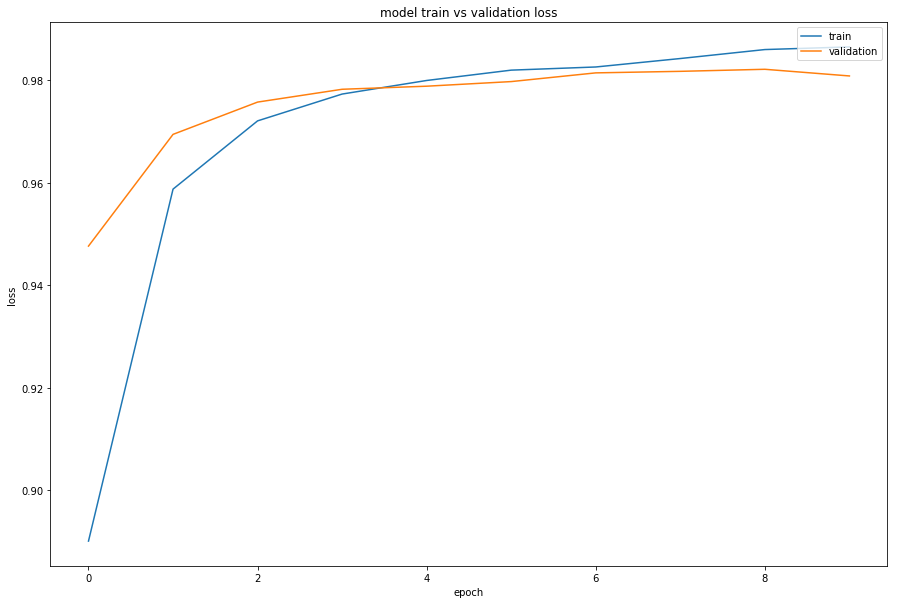

In [8]:
plt.figure(figsize=[15,10])
plt.plot(fitting.history['acc'])
plt.plot(fitting.history['val_acc'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Accuracy=0.9808
Confusion matrix:
[[ 972    0    3    0    0    2    1    1    1    0]
 [   0 1126    3    1    0    0    3    1    1    0]
 [   1    4 1014    3    1    0    1    5    1    2]
 [   0    0    3 1000    0    3    0    1    3    0]
 [   1    0    3    0  968    0    2    0    0    8]
 [   2    0    2    6    0  877    2    0    3    0]
 [   8    2    2    0    5    2  936    0    3    0]
 [   1    3   16    3    1    0    0  995    3    6]
 [   8    0    5    3    3    3    1    2  944    5]
 [   4    3    0    4   10    4    0    5    3  976]]
Confusion matrix:
[[ 972    0    3    0    0    2    1    1    1    0]
 [   0 1126    3    1    0    0    3    1    1    0]
 [   1    4 1014    3    1    0    1    5    1    2]
 [   0    0    3 1000    0    3    0    1    3    0]
 [   1    0    3    0  968    0    2    0    0    8]
 [   2    0    2    6    0  877    2    0    3    0]
 [   8    2    2    0    5    2  936    0    3    0]
 [   1    3   16    3    1    0    0  995    3

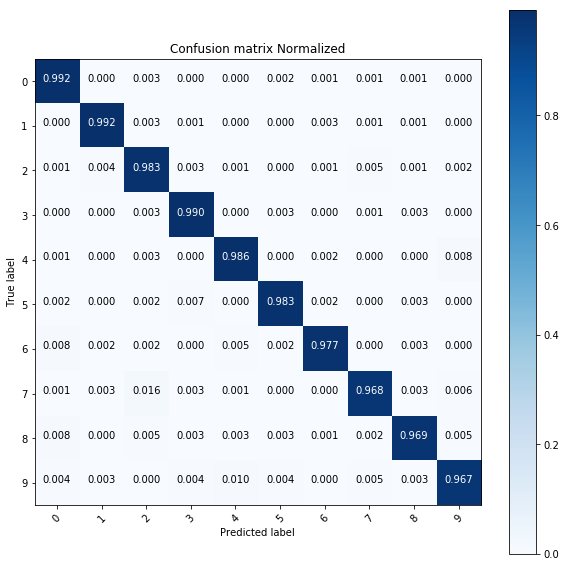

In [9]:
expected = y_test.argmax(axis=1)
predicted = model.predict(x_test).argmax(axis=1);
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)